In [3]:
import pandas as pd
import nltk
import matplotlib.pyplot as pl

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Embedding,Flatten,Conv1D,MaxPooling1D,LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import gensim

import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools






In [8]:
df=pd.read_csv('/Users/rissu/trainesentiment.csv',encoding='ISO-8859-1',
               names=["target", "ids", "date", "flag", "user", "text"])

In [12]:
train_size=0.8

# Text cleaning
re='@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

# for word2vector
w2v_size=300
w2v_window=7
w2v_epoch=32
w2v_min_count=10


# for Keras
sequence_length=300
epochs=8
batch_size=1024

# sentiment
positive='Positive'
negative='negative'
neutral='neutral'
sentiment_thresold=(0.4,0.7)

# For exporting
keras_model='model.h5'
word2vec_model='model.w2v'
tokenizer_model='tokenizer.pkl'
encoder_model='encoder.pkl'


In [14]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [18]:
len(df),"Shape is ->",df.shape

(1600000, 'Shape is ->', (1600000, 6))

In [21]:
decode_map={0:'negative',4:'positive'}

<IPython.core.display.Javascript object>

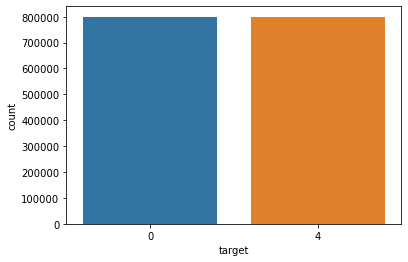

In [19]:
sns.countplot(df['target'])